In [2]:
#pip install --upgrade simplevec

In [3]:
#pip show simplevec

In [4]:
from simplevec import * 

In [5]:
#pip install --upgrade gensim
from gensim.models import Word2Vec as word2vec 

In [6]:
import matplotlib.pyplot as plt

In [7]:
#############################################################################
############################################################################# 

In [8]:
#############################################################################
#############################################################################

In [9]:
vec1 = user2vec['U0001']
vec2 = item2vec['I0001'] 

vec1 = np.array([vec1])
vec2 = np.array([vec2]) 

VecDist(vec1,vec2)  

array([26.116281934011877], dtype=object)

In [10]:
print(vec1.shape)
print(vec2.shape) 

(1, 6)
(1, 6)


In [11]:
#############################################################################
#############################################################################

In [12]:
#############################################################################
#############################################################################

In [13]:
RevDF['SALE'].mean()

0.444916903728103

In [14]:
RevDF['SALE'].sum() / RevDF['UID'].nunique() 

14.858

In [15]:
#RevDF.head(10)

In [16]:
RevDF.columns

Index(['UID', 'IID', 'DIST', 'DPER', 'AFFIN', 'RATING', 'SALE'], dtype='object')

In [17]:
#cols = ['UID', 'IID','RATING']
#RevDF2 = RevDF[cols].copy() 

In [18]:
#RevDF2.head(10) 

In [19]:
Sales = RevDF[RevDF['SALE']==1].copy() 
Sales = RevDF.copy() 

In [20]:
Sales

,UID,IID,DIST,DPER,AFFIN,RATING,SALE
0,U0001,I0001,26.116282,0.922561,0.005997,1,0
1,U0001,I0013,24.770108,0.869527,0.017023,1,0
2,U0001,I0017,21.406486,0.663592,0.113170,2,0
3,U0001,I0033,20.056318,0.558154,0.195228,3,0
4,U0001,I0035,25.998898,0.919027,0.006557,1,0
...,...,...,...,...,...,...,...
33390,U1000,I0447,25.126589,0.885159,0.013188,1,0
33391,U1000,I0453,12.233922,0.084297,0.838513,9,1
33392,U1000,I0465,14.540967,0.180062,0.672298,7,1
33393,U1000,I0491,20.996264,0.632928,0.134742,2,0


In [21]:
# ['UID' ,'IID' ,'SALE']
# ['ENT1','ENT2','SCORE'] 

In [22]:
#############################################################################
#############################################################################
#############################################################################

In [23]:
Notes = '''

model = SimpleVecModel() 

# Given: A Matrix of ['UID','IID'] pairs, "relations":

model.fit(relations,vec_len=30)  

vec = model.vec[UID] 

cos_sim = model.cos_sim(A,B) 


'''

In [24]:
#word2vec?

In [25]:
#############################################################################
#############################################################################

In [26]:
relations = RevDF[RevDF['SALE']==1][['UID','IID']].values
print(relations[:10]) 

[['U0001' 'I0112']
 ['U0001' 'I0132']
 ['U0001' 'I0215']
 ['U0001' 'I0230']
 ['U0001' 'I0241']
 ['U0001' 'I0248']
 ['U0001' 'I0485']
 ['U0001' 'I0487']
 ['U0001' 'I0497']
 ['U0001' 'I0498']]


In [27]:
model = SimpleVecModel() 
model.fit(relations) 

Done fitting embedding model.


In [28]:
relations

array([['U0001', 'I0112'],
       ['U0001', 'I0132'],
       ['U0001', 'I0215'],
       ...,
       ['U1000', 'I0453'],
       ['U1000', 'I0465'],
       ['U1000', 'I0496']], dtype=object)

In [29]:
ent1 = 'U0001'
vec1 = model.ent2vec(ent1) 
vec1

array([ 0.4592311 ,  0.89366484,  0.9038468 ,  1.1303837 , -0.69464254,
        1.4719299 , -0.14014947, -2.0569756 , -0.00274667, -0.6791041 ],
      dtype=float32)

In [30]:
matches = model.similar(ent1) 

In [31]:
matches[:5] 

['I0325', 'I0378', 'U0885', 'U0561', 'U0098']

In [32]:
ent2 = 'U0183'
vec2 = model.ent2vec(ent2)  
vec2

array([-0.48382926,  0.98752856, -0.84151226, -0.08271643,  0.80765486,
        0.9367964 , -1.2647958 ,  1.1292089 , -0.6804368 , -0.24613418],
      dtype=float32)

In [33]:
ent_id = model.ent2id[ent1] 
results = model.w2v.predict_output_word([ent_id],10)  
id_matches = [a[0] for a in results] 
match_vecs = np.array([model.id2vec[ent_id] for ent_id in id_matches]) 

In [34]:
ave_vec = normalize(match_vecs.sum(0)) 

In [35]:
ave_vec

array([ 1.0346307 ,  0.6275364 , -0.22850122,  0.38164997, -0.3206106 ,
        1.803151  ,  0.06726698, -1.6355432 , -0.22899464, -1.5005854 ],
      dtype=float32)

In [36]:
#############################################################################
#############################################################################

In [37]:
### EVALUATE THE EMBEDDINGS BY CALCULATING THE LATENT DISTANCE OF THE TRUE EMBEDDINGS 
### AND COMPARING TO THE COSINE SIM OF THE INFERRED/MODELED EMBEDDINGS.

TDF = RevDF[['UID','IID','DIST']].copy() 

results = []
for r in TDF.values:
    ent1,ent2,dist = tuple(r) 
    
    vec1 = model.ent2vec(ent1)
    vec2 = model.ent2vec(ent2) 
    
    if len(vec1)<1 or len(vec2)<1: continue 
    cos_sim = cosine_sim_vec(vec1,vec2)
    results.append([ent1,ent2,dist,cos_sim]) 
    
RDF = pd.DataFrame(results)
RDF.columns = ['UID','IID','DIST','COS_SIM'] 
    
coverage = len(RDF)/len(TDF) 
print('Evaluation Coverage:',round(coverage,6))

Evaluation Coverage: 0.993262


In [38]:
RDF['COS_SIM'].mean() 

0.0793101

In [39]:
vec1

array([-1.5064095 , -1.2720381 ,  0.30893102, -1.9923888 ,  1.7745386 ,
       -1.197832  ,  0.27947608,  0.597805  ,  1.5102139 , -2.876144  ],
      dtype=float32)

In [40]:
vec2

array([-0.3181232 , -0.28822452, -0.13922586, -0.13334763,  0.4184772 ,
       -0.08488743,  0.4068529 ,  0.20852292,  0.5305772 , -0.16419476],
      dtype=float32)

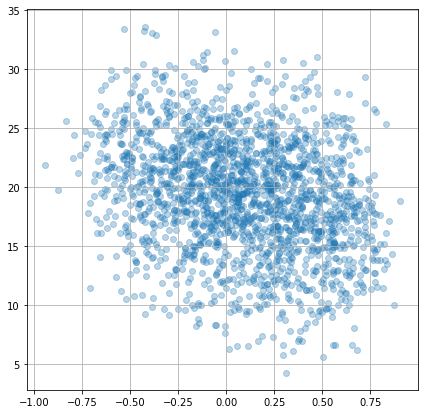

In [41]:
TDF = RDF.sample(2000)

y = TDF['DIST'].values
x = TDF['COS_SIM'].values

fig = plt.figure(figsize=(7,7))
plt.scatter(x,y,alpha=0.3)
plt.grid() 
plt.show();

print() 

In [42]:
corr = CalcCorr(x,y)
print('Corelation performance:')
print('(Should be negative.)')
print(round(corr,7))

Corelation performance:
(Should be negative.)
-0.2621132


In [43]:
#############################################################################
#############################################################################